In [26]:
import seaborn as sn
from trainer import Trainer
from dataset import DCASE
from CNN import CNN
import torch
from torch.utils.data import DataLoader
from path import Path
import numpy as np

In [11]:
dataset = DCASE(Path('./ADL_DCASE_DATA/evaluation'), 3)
loader = DataLoader(dataset, shuffle=False, batch_size=1)
model = CNN(3, dataset.get_num_clips())
trainer = Trainer(model, None, loader, torch.nn.CrossEntropyLoss(), torch.optim.Adam(model.parameters(), lr=1e-2), None, torch.device('cpu'))

In [15]:
def print_per_class_accuracy():
        classes = {0: 'beach',
                   1: 'bus',
                   2: 'cafe/restaurant',
                   3: 'car',
                   4: 'city_center',
                   5: 'forest_path',
                   6: 'grocery_store',
                   7: 'home',
                   8: 'library',
                   9: 'metro_station',
                  10: 'office',
                  11: 'park',
                  12: 'residential_area',
                  13: 'train',
                  14: 'tram'}

        correct_pred = {classname: 0 for classname in classes.keys()}
        incorrect_pred = {classname: {class_n: 0 for class_n in classes.keys()} for classname in classes.keys()}
        total_pred = {classname: 0 for classname in classes.keys()}

        model.eval()
        with torch.no_grad():
            for batch, labels in loader:
                
                logits = model(batch.to(torch.device('cpu')))
                preds = logits.argmax(-1).cpu().numpy()

                for label, pred in zip(labels.cpu().numpy(), preds):
                    if label == pred:
                        correct_pred[label] += 1
                    incorrect_pred[label][pred] += 1
                    total_pred[label] += 1

        print(correct_pred)
        print("=========================")
        print(incorrect_pred)
        
        for classname, correct in correct_pred.items():
            accuracy = 100 * float(correct) / total_pred[classname]
            print("Accuracy for class {:5s} is: {:.1f}%".format(classes[classname], accuracy))
            
        return incorrect_pred

In [16]:
out = print_per_class_accuracy()

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}
{0: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 1: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 5: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 6: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 26, 14: 0}, 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 5, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 21, 14: 0}, 8: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 25, 1

In [22]:
classes = {0: 'beach',
                   1: 'bus',
                   2: 'cafe/restaurant',
                   3: 'car',
                   4: 'city_center',
                   5: 'forest_path',
                   6: 'grocery_store',
                   7: 'home',
                   8: 'library',
                   9: 'metro_station',
                  10: 'office',
                  11: 'park',
                  12: 'residential_area',
                  13: 'train',
                  14: 'tram'}

class_list = list(classes.values())

lol = np.array([[x for x in y.values()] for y in out.values()])

In [21]:
lol

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0

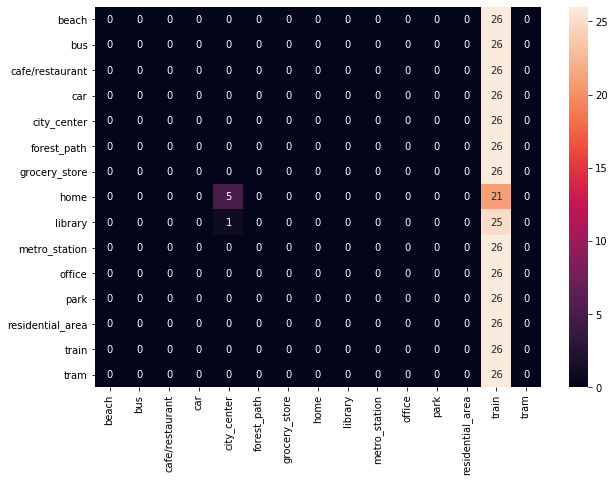

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(lol, index = [i for i in class_list],
                  columns = [i for i in class_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)